In [ ]:
import numpy as np #1.24.4
import os
import cv2 #4.9.0
from matplotlib import pyplot as plt
import pickle as pkl

In [2]:
input_dataset = os.path.join(os.path.dirname(os.getcwd()), 'datasets')
#input_dataset

In [3]:
medicine_list = os.listdir(input_dataset)
#medicine_list

In [4]:
a = np.array(cv2.resize(cv2.imread('c:/Users/PC/OneDrive/Desktop/MedicurePlus/Backend/datasets/Aspirin/1.png', cv2.IMREAD_GRAYSCALE), (128, 128)).flat)
b = np.array(cv2.resize(cv2.imread('c:/Users/PC/OneDrive/Desktop/MedicurePlus/Backend/datasets/Aspirin/2.png', cv2.IMREAD_GRAYSCALE), (128, 128)).flat)
inp_vec = np.array([a, b])

In [5]:
image_mat = []
for medicine_name in medicine_list:
    show_list = []
    for image_ in os.listdir(os.path.join(input_dataset, medicine_name)):
        image_path = os.path.join(os.path.join(input_dataset, medicine_name), image_)
        show_list.append(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE))
    image_mat.append(show_list.copy())
    show_list.clear()

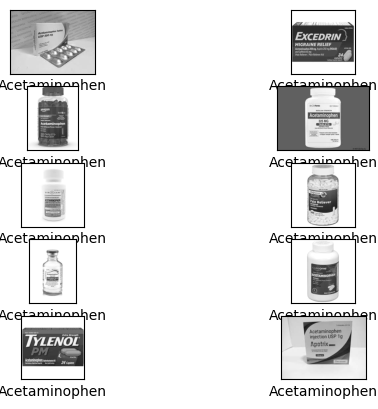

In [6]:
index = 1
for image_ in image_mat[0]:
    plt.subplot(5, 2, index)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(image_, cmap='gray')
    plt.xlabel(medicine_list[0])
    index += 1

In [153]:
class NeuralNetwork:
    def __init__(self) -> None:
        self.layers = []
        self.biases = []
        self.iterator = []
    
    def addLayer(self, *args) -> None:
        randomWeights = np.random.randn(*args)
        biasLayer = np.random.randn()
        self.layers.append(randomWeights)
        self.biases.append(biasLayer)

    def RELU(self, inp):
        return np.maximum(0, inp)
    
    def SoftMax(self):
        return self.iterator / np.sum(self.iterator, axis=0)
    
    def test(self, inp : list[any]):
        self.iterator = np.array(inp).T
        for layer, bias in zip(self.layers, self.biases):
            print(f'{layer.shape} * {self.iterator.shape}')
            self.iterator = self.RELU(np.dot(layer, self.iterator) + bias)
        return self.handleOutput(self.SoftMax())

    def handleOutput(self, probability): 
        thresold = np.max(probability, axis=0)
        print(thresold)
        return np.argwhere(probability == thresold).T[0]


In [154]:
network = NeuralNetwork()
network.addLayer(128, 128 * 128)
network.addLayer(258, 128)
network.addLayer(len(medicine_list), 258)

In [160]:
output = network.test([a])

(128, 16384) * (16384, 1)
(258, 128) * (128, 1)
(86, 258) * (258, 1)
[0.06968152]


array([2, 2, 3, 4])